## 1. Make classification data and get ready

In [4]:
import sklearn

In [5]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# Create make_circles
X,y = make_circles(n_samples, 
                   noise=0.03,
                   random_state=42)

In [6]:
len(X), len(y)

(1000, 1000)

In [7]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [8]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [9]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0], 
                        "X2": X[:,1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


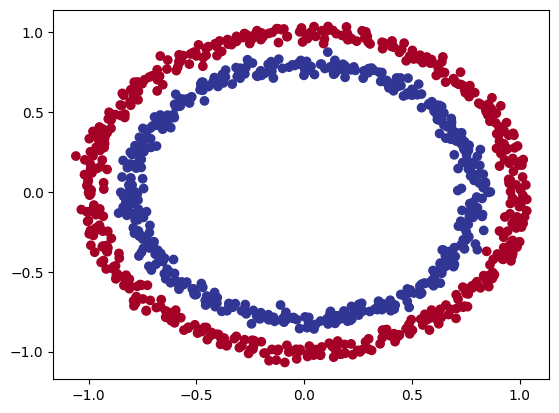

In [10]:
# Visualize visualize visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

### 1.1 Check input and output shapes

In [11]:
X.shape, y.shape

((1000, 2), (1000,))

In [12]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for 1 sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for 1 sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for 1 sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for 1 sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create traina nd test splits

In [13]:
# Turn data into tensors
import torch
torch.__version__

'2.2.0'

In [14]:
type(X)

numpy.ndarray

In [19]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

TypeError: expected np.ndarray (got Tensor)

In [16]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [17]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 is usually used for testing
                                                    random_state=42) #equivalent to setting a random seed. We use since torch.manual_seed only works on torch code.

In [15]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [16]:
n_samples

1000

### 2. Building a model

Let's build a model to classify the blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one 
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [17]:
# Import PyTorch and nn
import torch
from torch import nn
from functions import get_device

# Make device agnostic code
device = get_device()
device

'mps'

In [18]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've set up device agnostic code, let's create a model that: 

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shape of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computations) of the model
4. Instantiate an instance of our model class and send it to the target `device`

In [19]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

        # 2. Alternative way to define layers
        # self.two_linear_layers = nn.Sequential(
        # nn.Linear(in_features=2, out_features=5),
        # nn.Linear(in_features=5, out_features=1)
        # )

    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x):
        # return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
        return self.two_linear_layers(x)

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
next(model_0.parameters()).device

device(type='mps', index=0)

There is a simpler way of doing this by using `nn.Sequential` but this does not generalize as well.
`nn.Sequential` is a subclass of `nn.Module`

In [21]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5765,  0.2608],
                      [-0.3489,  0.4825],
                      [ 0.4970, -0.0049],
                      [-0.0766,  0.5772],
                      [-0.0141,  0.2869]], device='mps:0')),
             ('0.bias',
              tensor([ 0.0328, -0.2932, -0.2109, -0.3695, -0.1691], device='mps:0')),
             ('1.weight',
              tensor([[-0.2498, -0.4315,  0.0187, -0.3813, -0.2943]], device='mps:0')),
             ('1.bias', tensor([0.1494], device='mps:0'))])

In [23]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[ 0.0414],
        [-0.0997],
        [ 0.6017],
        [-0.1181],
        [ 0.9040],
        [ 0.8156],
        [ 0.1787],
        [ 0.3938],
        [ 0.5881],
        [-0.1058]], device='mps:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [24]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

#### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again... this is problem specific.

For examples for regression you might wnat MAE or MSE

For classification you might want binary cross entropy or categorical cross entropy (cross entropy)

As a reminder, the loss function measures how *wrong* your model predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built in options

* For the loss function we're going to use `torch.nn.BeCWithLogitsLoss()`
* For different optimizers see `torch.optim`
* For common choices of both see: https://www.learnpytorch.io/02_pytorch_classification/#21-setup-loss-function-and-optimizer

In [25]:
# Setup the loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
# nn.Sequential(
#     nn.Sigmoid(),
#     nn.BCELoss()
# )

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function
                                 # This is numerically more stable than using plain sigmoid followed by BCEloss as both are combined into one layer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [26]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # item returns a torch number as a standard python number
    acc = (correct/len(y_pred)) * 100
    return acc

### 3. Training a model

To train our model, we're going to need to build a training loop

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad (reset gradient)
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

#### 3.1 Going from raw logits -> prediction probabilities -> preidction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them (for binary) or taking the `argmax()` (for softmax).

In [27]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval() # DO
with torch.inference_mode(): # DO; Both these steps are needed when running the model for predictions/evaluation
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.0414],
        [-0.0997],
        [ 0.6017],
        [-0.1181],
        [ 0.9040]], device='mps:0')

In [28]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [29]:
# Use the sigmoid activation functionon our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5104],
        [0.4751],
        [0.6461],
        [0.4705],
        [0.7118]], device='mps:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [30]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='mps:0')


tensor([1., 0., 1., 0., 1.], device='mps:0')

In [31]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [32]:
torch.manual_seed(42)

# set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCEWithLogitsLoss expects logits 
    #               y_train)
    loss = loss_fn(y_logits,  # nn.BCEWithLogitsLoss expects logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)   

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    #### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test, #switch up argument order to be consistent with scikit-learn (pytorch has weird order)
                               y_pred=test_pred)
        
        # Print out what's happening
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.73908 | Acc: 57.38% | Test loss: 0.71679 | Test acc: 60.50%
Epoch: 10 | Loss: 0.71749 | Acc: 53.00% | Test loss: 0.70166 | Test acc: 52.50%
Epoch: 20 | Loss: 0.70798 | Acc: 51.50% | Test loss: 0.69564 | Test acc: 53.50%
Epoch: 30 | Loss: 0.70332 | Acc: 50.88% | Test loss: 0.69312 | Test acc: 53.00%
Epoch: 40 | Loss: 0.70079 | Acc: 50.00% | Test loss: 0.69201 | Test acc: 53.50%
Epoch: 50 | Loss: 0.69926 | Acc: 49.88% | Test loss: 0.69152 | Test acc: 53.50%
Epoch: 60 | Loss: 0.69825 | Acc: 49.75% | Test loss: 0.69130 | Test acc: 54.00%
Epoch: 70 | Loss: 0.69752 | Acc: 49.25% | Test loss: 0.69120 | Test acc: 53.50%
Epoch: 80 | Loss: 0.69696 | Acc: 48.62% | Test loss: 0.69117 | Test acc: 53.50%
Epoch: 90 | Loss: 0.69651 | Acc: 48.62% | Test loss: 0.69116 | Test acc: 53.00%


### 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual!

In other words; "Visualize, visualize, visualize!"

To do so, we're going to import a function called `plot_decision_boundary()` https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py 

In [33]:
import requests
from pathlib import Path

# Download helper functions from Learn Pytorch repo (if it's not alrady downloaded)
if Path("helper_function.py").is_file():
    print("helper_functions.py already exists, skip download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

/Users/amyfan/Desktop/pytorch-walkthrough/.venv/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/amyfan/Desktop/pytorch-walkthrough/.venv/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <F263C8ED-23C1-35DD-BD33-2CD667C0ED1D> /Users/amyfan/Desktop/pytorch-walkthrough/.venv/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <44DEDA27-4DE9-3D4A-8EDE-5AA72081319F> /Users/amyfan/Desktop/pytorch-walkthrough/.venv/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


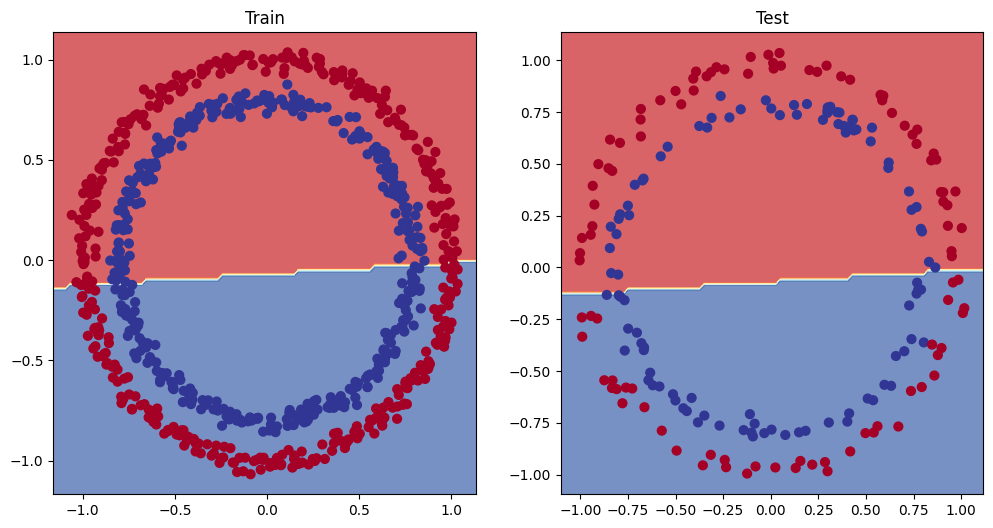

In [34]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_0,
                       X=X_train,
                       y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### 5. Improving a model (from a model perspective)
* Adding more layers - give the model more chances o learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Changing the learning rate
* Change the loss function

These options are all from a model's perspective (not data perspective) because they deal directly with the model, rather than the data.

And because these options are all values we (a ml engineers and data scientists) can change, they are **hyperparameters**

Let's try and improve model by:
* Adding more hidden units: 5->10
* Increase number of layers:2->3
* Increase the number of epochs: 100->1000

In [35]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5778,  0.1773],
                      [-0.3468,  0.3669],
                      [ 0.4968,  0.0154],
                      [-0.0747,  0.4929],
                      [-0.0127,  0.2023]])),
             ('0.bias', tensor([ 0.0866, -0.2110, -0.2201, -0.3025, -0.1112])),
             ('1.weight',
              tensor([[-0.1832, -0.2128,  0.0666, -0.1038, -0.1704]])),
             ('1.bias', tensor([-0.0785]))])

In [36]:
# Create a larger model (subclass nn.Module method; not nn.Sequential method which is another way to sublcass nn.Module)
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        # Create 3 nn.Linear layers
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x))) 
    
# 4. Instantiate an instance of our model class and send it to the target device
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [37]:
# Setup a loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.1)

# Set the manual seed
torch.manual_seed(42)

# Training code
epochs = 1000

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_1.train()
    
    # forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # Calculate loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # zero grad
    optimizer.zero_grad()

    # back prop
    loss.backward()

    # optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Calculate test loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        
        # Print out what's happening
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396 | Acc: 50.88% | Test loss: 0.79303 | Test acc: 50.00%
Epoch: 100 | Loss: 0.69298 | Acc: 51.50% | Test loss: 0.69470 | Test acc: 45.50%
Epoch: 200 | Loss: 0.69317 | Acc: 48.62% | Test loss: 0.69502 | Test acc: 46.00%
Epoch: 300 | Loss: 0.69298 | Acc: 51.12% | Test loss: 0.69468 | Test acc: 46.00%
Epoch: 400 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test acc: 46.00%
Epoch: 500 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test acc: 46.00%
Epoch: 600 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test acc: 46.00%
Epoch: 700 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test acc: 46.00%
Epoch: 800 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test acc: 46.00%
Epoch: 900 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test acc: 46.00%


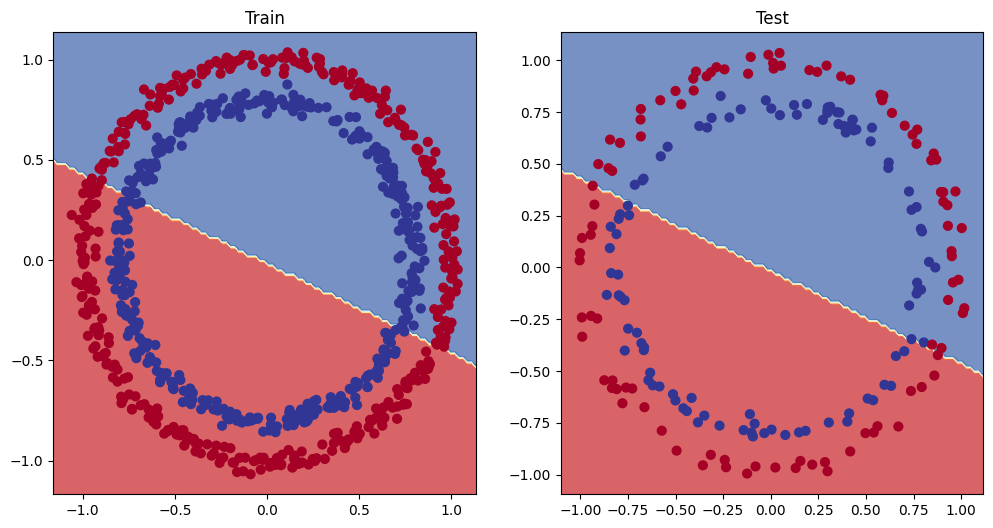

In [38]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_1,
                       X=X_train,
                       y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot a larger problem is to start by testing a smaller problem (is it even learning at all?)

In [39]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula without epsilon

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [40]:
### Split like in the video

# Create train and test splits
train_split = int(.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

In [41]:
### Split with sklearn

from sklearn import model_selection as skm
# Create train and test splits
train_split = int(.8 * len(X_regression))
X_train_regression, X_test_regression, y_train_regression, y_test_regression = skm.train_test_split(X_regression, y_regression, test_size=0.2)

# Check the lengths
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

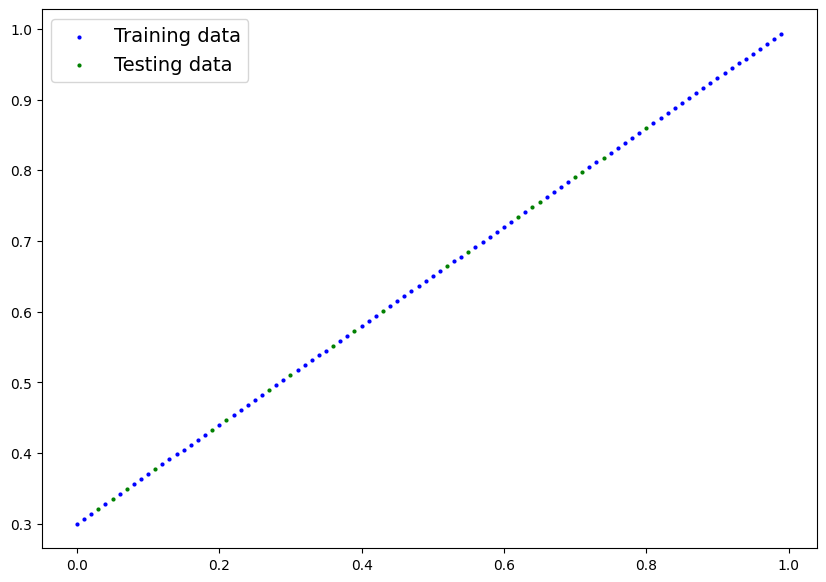

In [42]:
from helper_functions import plot_predictions
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

#### 5.2 Adjusting `model_1` to fit a straight line

In [43]:
X_train_regression[0] # size 1 tensor 

tensor([0.8700])

In [44]:
model_1 # takes 2 features as input, need to adjust model_1 to take in 1 feature

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [45]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [46]:
# Loss and optimizer
loss_fn = nn.L1Loss() # need to adjust because regression rather than classification problem
optimizer = torch.optim.SGD(params=model_2.parameters(), # keep same
                            lr=0.01)

In [49]:
# Train the model
torch.manual_seed(42)

# set number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
    ### training
    model_2.train()

    # forward pass
    y_pred = model_2(X_train_regression)

    # Calculate loss
    loss = loss_fn(y_pred, y_train_regression)

    # zero grad
    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
        # forward pass
        test_pred = model_2(X_test_regression)

        # Calculate test loss
        test_loss = loss_fn(test_pred, y_test_regression)

        # Print out what's happening
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.01809 | Test loss: 0.01189
Epoch: 100 | Loss: 0.01775 | Test loss: 0.01178
Epoch: 200 | Loss: 0.01729 | Test loss: 0.01190
Epoch: 300 | Loss: 0.01732 | Test loss: 0.01152
Epoch: 400 | Loss: 0.01737 | Test loss: 0.01114
Epoch: 500 | Loss: 0.01742 | Test loss: 0.01076
Epoch: 600 | Loss: 0.01699 | Test loss: 0.01090
Epoch: 700 | Loss: 0.01623 | Test loss: 0.01082
Epoch: 800 | Loss: 0.01674 | Test loss: 0.01050
Epoch: 900 | Loss: 0.01506 | Test loss: 0.01045


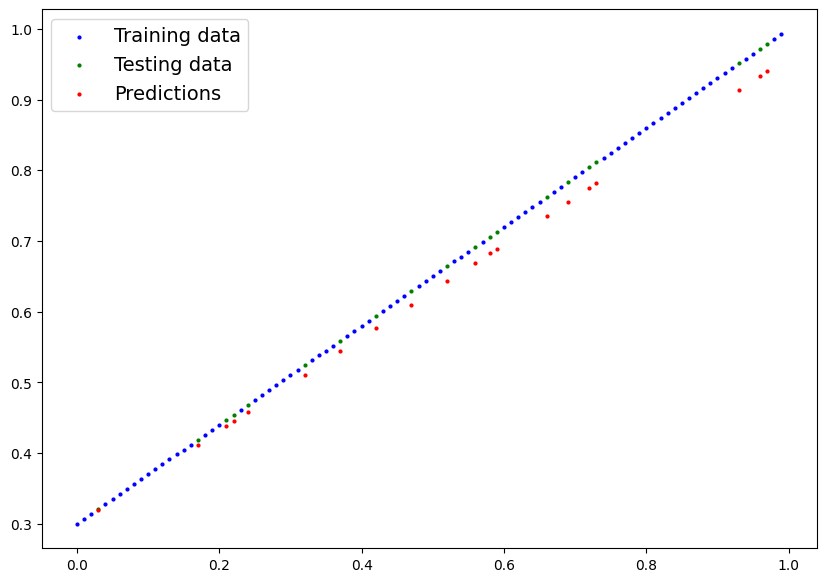

In [177]:
from helper_functions import plot_predictions

# Turn on evaluation mode
model_2.eval()

# Make predictions (inference) 
# matplotlib expects numpy which uses CPU. Convert MPS back to CPU.
with torch.inference_mode():
    y_preds_regression = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                    train_labels=y_train_regression.cpu(),
                    test_data=X_test_regression.cpu(),
                    test_labels=y_test_regression.cpu(),
                    predictions=y_preds_regression.cpu())


### 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

#### 6.1 Recreating non-linear data (red and blue circles)

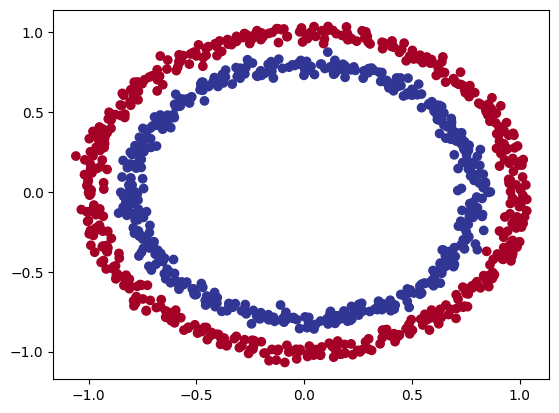

In [222]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [223]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test,y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)

### 6.2 Building a model with non-linearity

Artificial neural networks are a large combination of linear (straight) and nonlinear functions which are potentially able to find patterns in the data.

In [224]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV3(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # relu is a non-linear activation function

    def forward(self, x):
        # where should we put our non-linear activation functions?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
model_3 = CircleModelV3().to(device)
model_3

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [226]:
# set manual seed
torch.manual_seed(42)

# Loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.2)

# send data to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# set number of epochs
epochs = 1000

# training and testing loop
for epoch in range(epochs):
    ### Training
    model_3.train()

    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()
    
    ### Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)
    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.5682 | Acc: 87.75% | Test loss: 0.5732 | Test acc: 86.50%
Epoch: 100 | Loss: 0.3708 | Acc: 97.88% | Test loss: 0.4051 | Test acc: 92.50%
Epoch: 200 | Loss: 0.2984 | Acc: 88.12% | Test loss: 0.3361 | Test acc: 82.00%
Epoch: 300 | Loss: 0.0941 | Acc: 99.88% | Test loss: 0.1332 | Test acc: 99.50%
Epoch: 400 | Loss: 0.0562 | Acc: 99.88% | Test loss: 0.0853 | Test acc: 99.50%
Epoch: 500 | Loss: 0.0398 | Acc: 100.00% | Test loss: 0.0637 | Test acc: 100.00%
Epoch: 600 | Loss: 0.0307 | Acc: 100.00% | Test loss: 0.0519 | Test acc: 100.00%
Epoch: 700 | Loss: 0.0250 | Acc: 100.00% | Test loss: 0.0443 | Test acc: 100.00%
Epoch: 800 | Loss: 0.0211 | Acc: 100.00% | Test loss: 0.0388 | Test acc: 100.00%
Epoch: 900 | Loss: 0.0183 | Acc: 100.00% | Test loss: 0.0348 | Test acc: 100.00%


In [227]:
model_3.state_dict() # Relu doesn't have any parameters to learn

OrderedDict([('layer_1.weight',
              tensor([[ 0.9640,  1.6597],
                      [-0.5956,  2.3144],
                      [-0.1549,  0.1427],
                      [-2.6955, -0.3348],
                      [ 0.7602, -2.6806],
                      [ 1.3665, -0.1194],
                      [ 1.8670,  0.2380],
                      [ 0.3410, -0.0998],
                      [ 1.2201,  0.4633],
                      [-0.3301,  0.1802]], device='mps:0')),
             ('layer_1.bias',
              tensor([-0.2343, -1.0346, -0.2872, -0.6347, -0.6970, -0.6802, -0.8082, -0.4252,
                      -0.5560, -0.6984], device='mps:0')),
             ('layer_2.weight',
              tensor([[-0.0389, -0.8070,  0.2441, -0.3866, -0.4376, -0.0871, -0.2801,  0.2555,
                       -0.1814, -0.0997],
                      [ 1.6415,  2.2073,  0.1331,  2.3673,  2.2887,  1.1728,  1.7321,  0.0566,
                        1.1965, -0.1927],
                      [-0.3130, -0.1243,

#### 6.4 Evaluating a model trained with non-linear activation functions

In [228]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='mps:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='mps:0'))

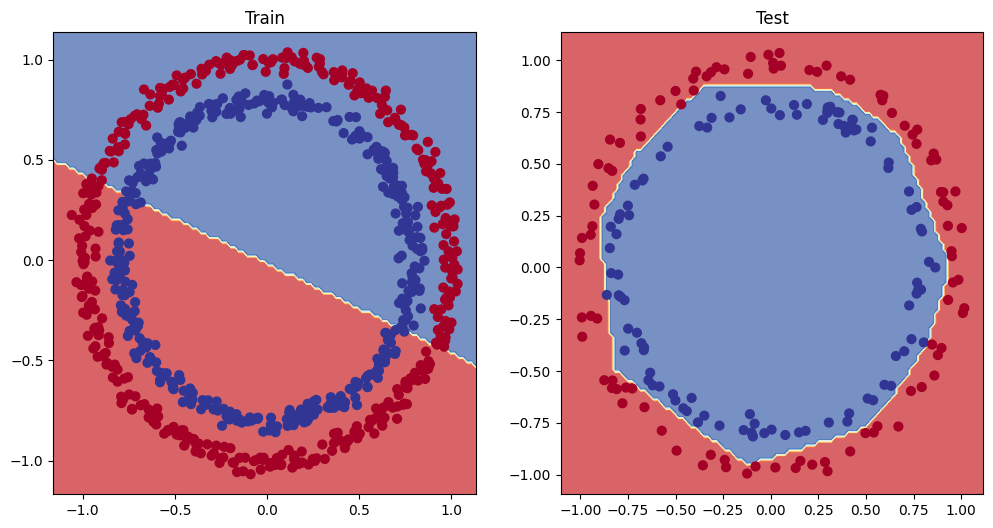

In [229]:
# Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,
                       X_train,
                       y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

### 7. Replicating non-linear activation functions

Neural networks, rather than us telling themodel what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear & non-linear functions.


In [230]:
# Creat a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

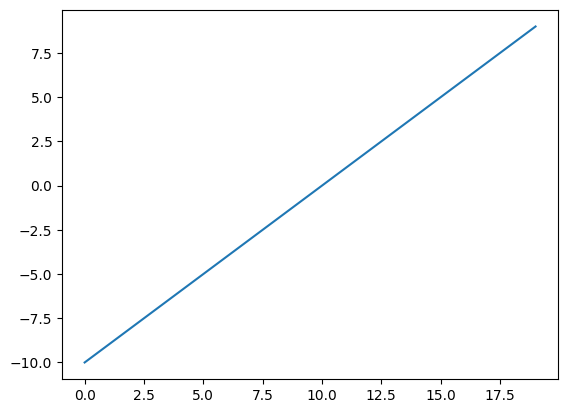

In [231]:
# Visualize the tensor
plt.plot(A)

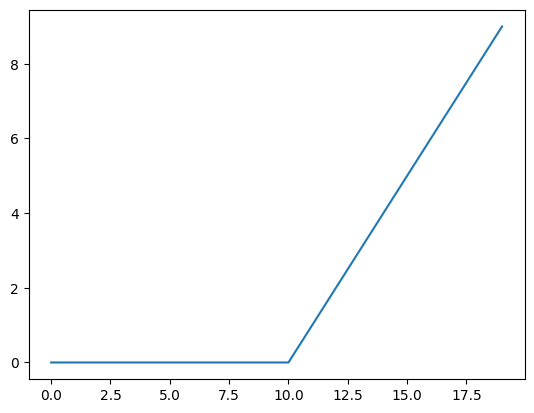

In [187]:
plt.plot(torch.relu(A))

In [188]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0), x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

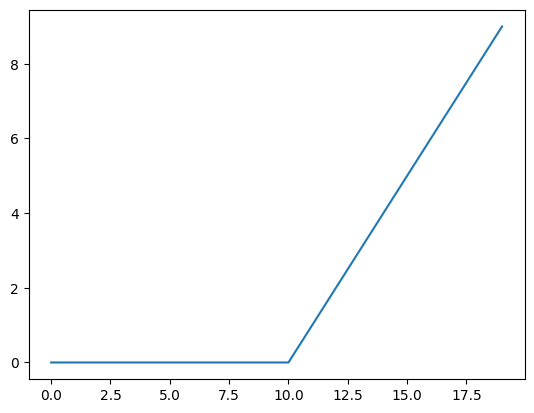

In [189]:
# Visualize the tensor
plt.plot(relu(A))

In [190]:
# Let's do the same for sigmoid
def sigmoid(x):
    return 1/(1 + torch.exp(-x))

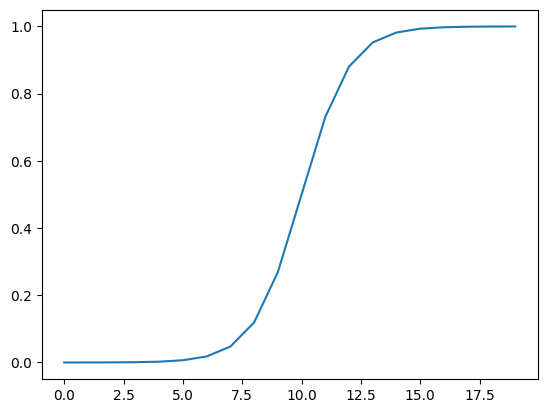

In [191]:
plt.plot(torch.sigmoid(A))

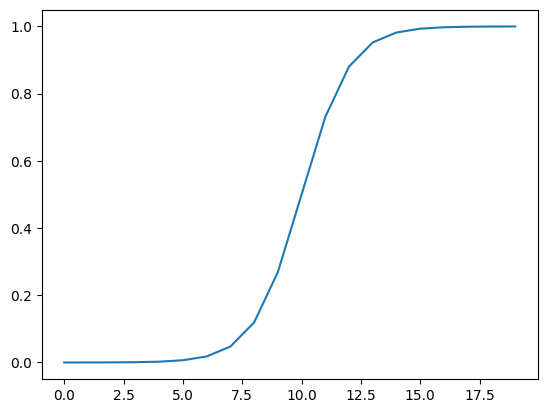

In [192]:
plt.plot(sigmoid(A))

### 8. Putting it all together with multi-class classification

* Binary classification = 1 or another (cat v. dog)
* Multi-class classification = more than 1 class (cat, dog, horse, bird)

#### 8.1 Creating a toy multi-class dataset

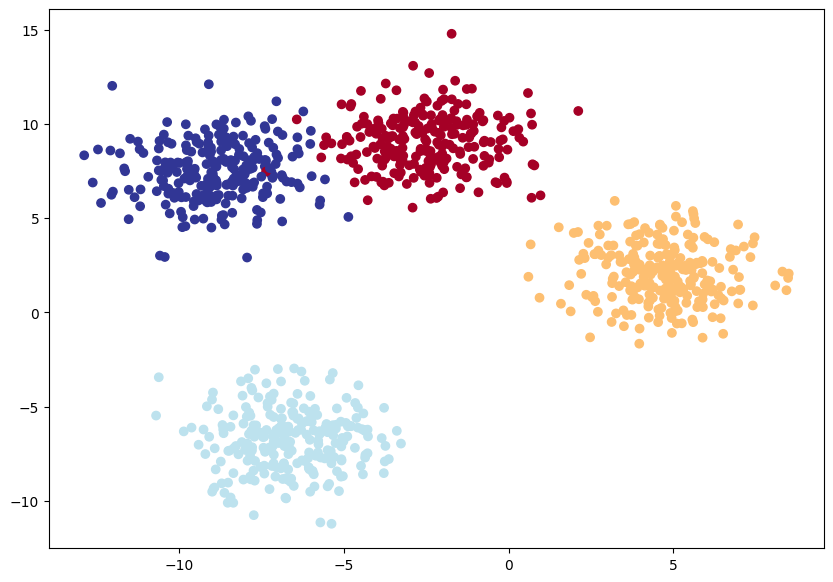

In [232]:
# Import dependencies 
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split data into training and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)
# Plot data (visualize visualize visualize)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

#### 8.2 Building a multi-class classification model in PyTorch

In [233]:
from functions import get_device

# Create device agnostic code
device = get_device()
device

'mps'

In [234]:
from torch import nn

# Build a multi-class classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes mutli-class classification model.
        
        Args:
            input_features: int, number of input features
            output_features: int, number of output features (number of output classes)
            hidden_units: int, number of hidden units between layers
            
        Returns:
        
        Example:
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(input_features, hidden_units),
            #nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            #nn.ReLU(),
            nn.Linear(hidden_units, output_features)
        )
    def  forward(self, x):
        return self.linear_layer_stack(x)
    
# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

In [196]:
X_blob_train.shape # 2 input features

torch.Size([800, 2])

In [197]:
torch.unique(y_blob_train) # 4 output classes

tensor([0, 1, 2, 3])

#### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [235]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

#### 8.4 Getting prediction probabilities for multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction lables.

Logits (raw outputs) -> Pred probs (use `torch.softmax`, dim=1) -> Pred labels (take `argmax`, dim = 1)

In [236]:
# Check model device
print(f"model device: {next(model_4.parameters()).device}") # MPS

# move all data to MPS device
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)

model device: mps:0


In [237]:
# Let's get some raw outputs from our model
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

In [238]:
# Shape is dimension 1 for multi-class. Unlike binary classification, we have more than 1 output for each prediction.
y_blob_test[:5], y_logits[:5]

(tensor([1, 3, 2, 1, 0], device='mps:0'),
 tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
         [ 1.7168, -1.2270,  1.7367,  2.1010],
         [ 2.2400,  0.7714,  2.6020,  1.0107],
         [-0.7993, -0.3723, -0.9138, -0.5388],
         [-0.4332, -1.6117, -0.6891,  0.6852]], device='mps:0'))

In [202]:
# Convert logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='mps:0')
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='mps:0')


In [203]:
torch.sum(y_pred_probs[0])

tensor(1.0000, device='mps:0')

In [204]:
torch.max(y_pred_probs[0]) # Find the maximum value in the first prediction

tensor(0.3715, device='mps:0')

In [205]:
torch.argmax(y_pred_probs[0]) # Find the index of the maximum value in the first prediction

tensor(3, device='mps:0')

In [206]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3], device='mps:0')

In [207]:
y_blob_test # same shape as y_preds which we want

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='mps:0')

In [208]:
len(y_preds), len(y_blob_test)

(200, 200)

#### 8.5 Creating a training and testing loop for a multi-class PyTorch model

In [1]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(params=model_4.parameters(),
#                             lr=0.1)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # item returns a torch number as a standard python number
    acc = (correctxz/len(y_pred)) * 100
    return acc

# set manual seed
torch.manual_seed(42)

# set number of epochs
epochs = 100

# Already moved data to MPS device

# Training and testing loop
for epoch in range(epochs):
    ### Training
    model_4.train()

    # Forward pass
    y_logits = model_4(X_blob_train)
    y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)
    
    # Accuracy and Loss
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_preds)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model_4.eval()

    with torch.inference_mode():
        # Forward pass
        test_logits = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

        # Accuracy and Loss
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_preds)
        test_loss = loss_fn(test_logits, y_blob_test)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")

NameError: name 'nn' is not defined

In [240]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# view first 5 raw model outputs
y_logits[:5]

tensor([[  4.3378,  10.3539, -14.8948,  -9.7643],
        [  5.0142, -12.0371,   3.3860,  10.6700],
        [ -5.5885, -13.3448,  20.9895,  12.7711],
        [  1.8400,   7.5600,  -8.6016,  -6.9943],
        [  8.0727,   3.2906, -14.5998,  -3.6186]], device='mps:0')

In [241]:
# Go from logits -> prediction probabilities
y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1).to(device)
y_preds[:5]

tensor([1, 3, 2, 1, 0], device='mps:0')

In [212]:
y_blob_test[:5]

tensor([1, 3, 2, 1, 0], device='mps:0')

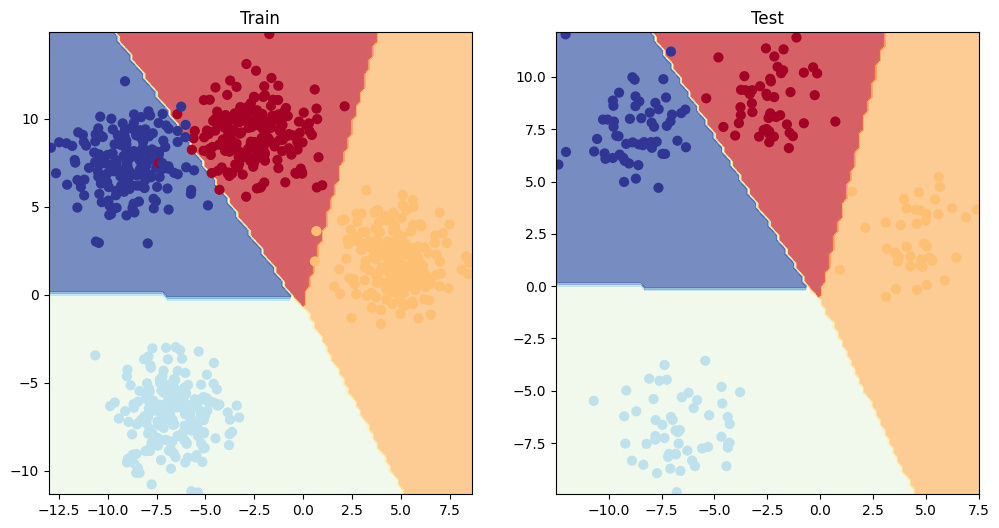

In [242]:
from helper_functions import plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,
                       X_blob_train,
                       y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### 9. A few more classification metrics... (to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right?
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

In [243]:
from torchmetrics import Accuracy
from torchmetrics.classification import MulticlassAccuracy

# Setup metric
torchmetric_accuracy = Accuracy(task = 'multiclass', num_classes=4).to(device)
torchmetric_accuracy_alt = MulticlassAccuracy(num_classes=4).to(device)

# Calculate accuracy
print(torchmetric_accuracy(y_preds, y_blob_test))
print(torchmetric_accuracy_alt(y_preds, y_blob_test))

tensor(0.9950, device='mps:0')
tensor(0.9956, device='mps:0')


# Debugging: nn.module subclassing in hw exercise

# Attempt 1: Trying on this file

mps


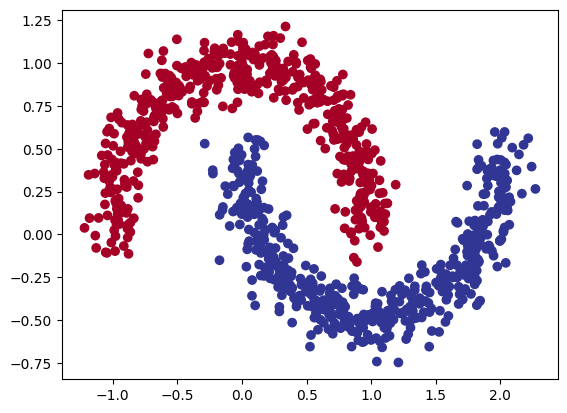

In [244]:
# Import torch
import torch

# Setup device agnostic code
from functions import get_device
device = get_device()
print(device)

# Setup random seed
RANDOM_SEED = 42

# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

N_SAMPLES = 1000
X, y = make_moons(n_samples = N_SAMPLES,
                  noise = 0.1,
                  random_state=RANDOM_SEED)

# Visualize the data on a scatter plot
import matplotlib.pyplot as plt

plt.scatter(x = X[:,0],
            y = X[:,1],
            c = y,
            cmap = plt.cm.RdYlBu
            )

In [245]:
# Turn data into tensors of dtype float
X = torch.tensor(X, dtype = torch.float)
y = torch.tensor(y, dtype = torch.float)


# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [246]:
# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ### used to initialize models of class MoonModel0
    def __init__(self, input_features, hidden_layers, output_features):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(input_features, hidden_layers),
            #nn.ReLU(),
            nn.Linear(hidden_layers, hidden_layers),
            #nn.ReLU(),
            nn.Linear(hidden_layers, output_features)
        )
    
    ### used when calling the initialized model
    def forward(self, x):
        return self.linear_layer_stack(x)

# Instantiate the model
model_0 = MoonModelV0(input_features=2,
                      hidden_layers=5,
                      output_features=1).to(device)

In [247]:
from torchmetrics import Accuracy

# Setup loss function
loss_fn = nn.BCELoss()

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = .01)

# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # item returns a torch number as a standard python number
    acc = (correct/len(y_pred)) * 100
    return acc

In [248]:
## TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 1000

# Send data to the device
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass (logits output)
  y_logits = model_0(X_train).squeeze()
  y_pred_labels = torch.round(torch.sigmoid(y_logits))
  

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train) 

  # Calculate the accuracy
  acc = accuracy_fn(y_pred_labels, y_train.int())

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression) 
  optimizer.step()

  ### Testing
  model_0.eval() 
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    test_logits = model_0(X_test).squeeze()
    test_pred_labels = torch.round(torch.sigmoid(test_logits))    

    # 2. Caculate the test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(test_pred_labels, y_test.int())

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"epoch: {epoch} | train loss {loss:.4f} | train accuracy {acc:.2f}% | test loss: {test_loss:.4f} | test accuracy: {test_acc:.2f}%")    

epoch: 0 | train loss 49.8813 | train accuracy 49.88% | test loss: 17.2411 | test accuracy: 49.50%
epoch: 100 | train loss 100.0000 | train accuracy 0.00% | test loss: 100.0000 | test accuracy: 0.00%
epoch: 200 | train loss 100.0000 | train accuracy 0.00% | test loss: 100.0000 | test accuracy: 0.00%
epoch: 300 | train loss 100.0000 | train accuracy 0.00% | test loss: 100.0000 | test accuracy: 0.00%
epoch: 400 | train loss 100.0000 | train accuracy 0.00% | test loss: 100.0000 | test accuracy: 0.00%
epoch: 500 | train loss 100.0000 | train accuracy 0.00% | test loss: 100.0000 | test accuracy: 0.00%
epoch: 600 | train loss 100.0000 | train accuracy 0.00% | test loss: 100.0000 | test accuracy: 0.00%
epoch: 700 | train loss 100.0000 | train accuracy 0.00% | test loss: 100.0000 | test accuracy: 0.00%
epoch: 800 | train loss 100.0000 | train accuracy 0.00% | test loss: 100.0000 | test accuracy: 0.00%
epoch: 900 | train loss 100.0000 | train accuracy 0.00% | test loss: 100.0000 | test accuracy

# Trying again: attempt 2 (Trying on linear data with previous working multiclass model)

In [250]:
model_5 = BlobModel(input_features=2,
                    output_features=1,
                    hidden_units=8).to(device)
accuracy_fn

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model_5.parameters(),
                            lr = 0.1)